# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
%%time
data = get_date_list(data)
data = run_engine(data)

 80%|██████████████████████████▍      | 76502/95275 [00:03<00:00, 19191.17it/s]

pls    0.00001
dtype: float64
--------------------------------------
                 date ord_types          close_type      pls
0 2021-01-04 01:15:27     short         simple_stop -0.00201
1 2021-01-04 05:21:11      long  simple_take_profit  0.00200
2 2021-01-04 12:16:09      long         simple_stop -0.00201
3 2021-01-04 14:51:26     short  simple_take_profit  0.00203


100%|█████████████████████████████████| 95275/95275 [00:04<00:00, 20129.16it/s]

Wall time: 7min 10s


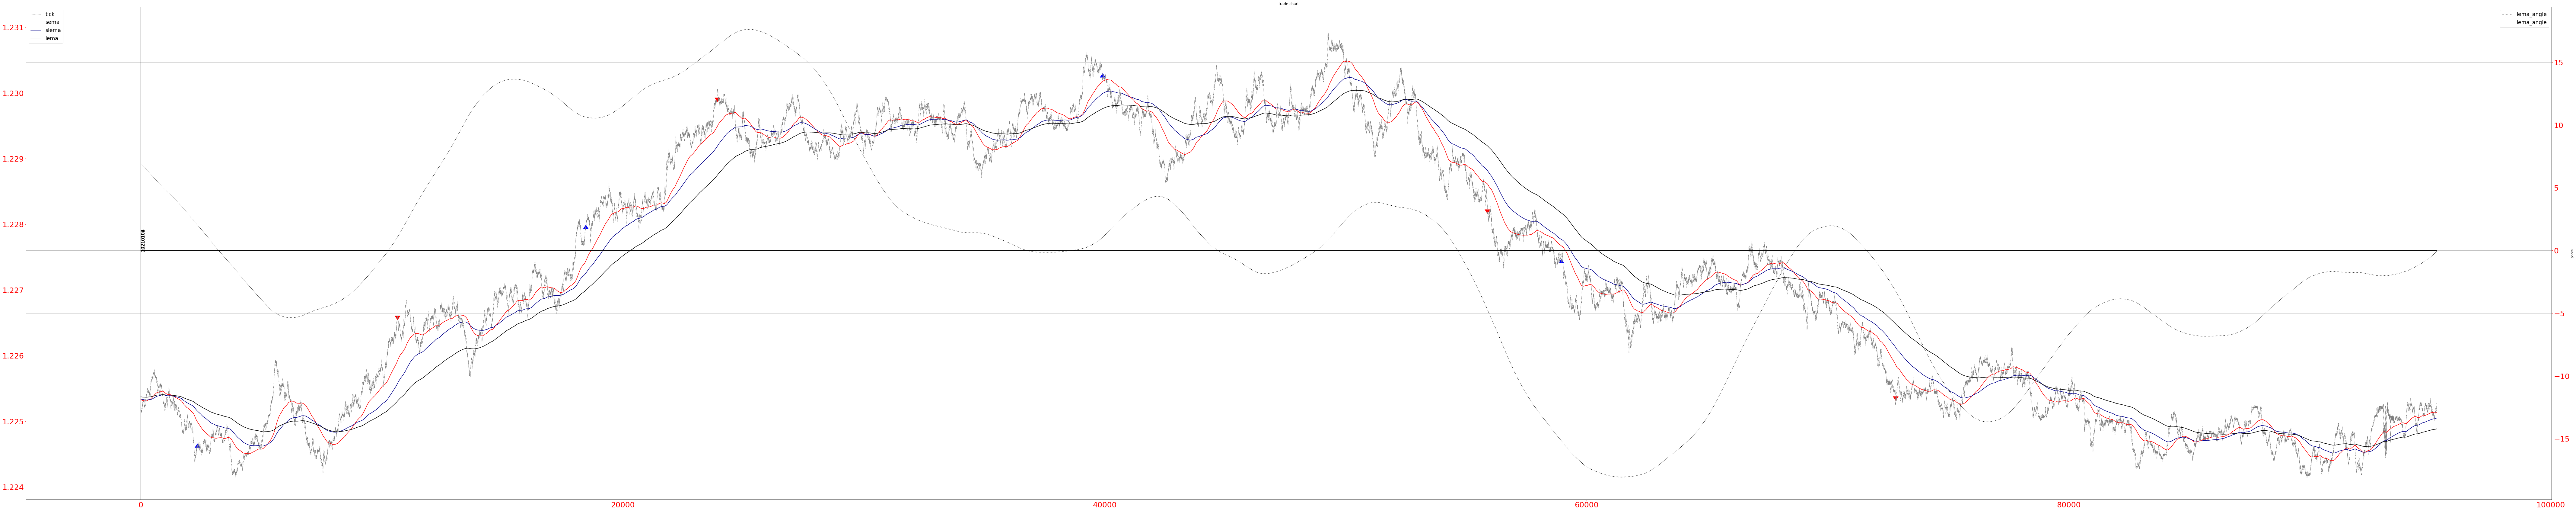

-----------------------------------------------------
date_val          : ['20210101', '20210102', '20210103', '20210104']
Total PL : 1.0000000000000026e-05
-------------
net_pl            : 1e-05/0.00805
-------------
+ve               : num= 2    sum= +0.00403    avg= +0.00202
-ve               : num= 2    sum= -0.00402    avg= -0.00201
-----------------------------------------------------
month_val
1    0.00001
Name: pls, dtype: float64
-----------------------------------------------------
simple_take_profit    2
simple_stop           2
Name: close_type, dtype: int64
-----------------------------------------------------


In [3]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')

In [4]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
4    0.00001
Name: pls, dtype: float64

In [5]:
data['report_df'].loc[data['report_df']['pls'] < 0, ['date', 'ord_types', 'close_type', 'pls']]

,date,ord_types,close_type,pls
0,2021-01-04 01:15:27,short,simple_stop,-0.00201
2,2021-01-04 12:16:09,long,simple_stop,-0.00201
